# Model Test #1:
* Did not remove or impute negative values from dataset
* Did not balance classes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import io, s3fs, json
pd.set_option('display.max_columns', None)
print('Program run at', dt.now())

Program run at 2021-05-29 12:40:27.662276


In [2]:
est = pd.read_csv('s3://bleeding-hearts/workingdata/merge_est.csv')
est.head(20)

,Unnamed: 0,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Civilian labor force_Unemployment Rate,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Females 16 years and over_In labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder under 6 years_All parents in family in labor force,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years_All parents in family in labor force,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,COMMUTING TO WORK_Mean travel time to work (minutes),OCCUPATION_Civilian employed population 16 years and over,"OCCUPATION_Civilian employed population 16 years and over_Management, business, science, and arts occupations",OCCUPATION_Civilian employed population 16 years and over_Service occupations,OCCUPATION_Civilian employed population 16 years and over_Sales and office occupations,"OCCUPATION_Civilian employed population 16 years and over_Natural resources, construction, and maintenance occupations","OCCUPATION_Civilian employed population 16 years and over_Production, transportation, and material moving occupations",INDUSTRY_Civilian employed population 16 years and over,"INDUSTRY_Civilian employed population 16 years and over_Agriculture, forestry, fishing and hunting, and mining",INDUSTRY_Civilian employed population 16 years and over_Construction,INDUSTRY_Civilian employed population 16 years and over_Manufacturing,INDUSTRY_Civilian employed population 16 years and over_Wholesale trade,INDUSTRY_Civilian employed population 16 years and over_Retail trade,"INDUSTRY_Civilian employed population 16 years and over_Transportation and warehousing, and utilities",INDUSTRY_Civilian employed population 16 years and over_Information,"INDUSTRY_Civilian employed population 16 years and over_Finance and insurance, and real estate and rental and leasing","INDUSTRY_Civilian employed population 16 years and over_Professional, scientific, and management, and administrative and waste management services","INDUSTRY_Civilian employed population 16 years and over_Educational services, and health care and social assistance","INDUSTRY_Civilian employed population 16 years and over_Arts, entertainment, and recreation, and accommodation and food services","INDUSTRY_Civilian employed population 16 years and over_Other services, except public administration",INDUSTRY_Civilian employed population 16 years and over_Public administration,CLASS OF WORKER_Civilian employed population 16 years and over,CLASS OF WORKER_Civilian employed population 16 years and over_Private wage and salary workers,CLASS OF WORKER_Civilian employed population 16 years and over_Government workers,CLASS OF WORKER_Civilian employed population 16 years and over_Self-employed in own not incorporated business workers,CLASS OF W

In [3]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(143), object(4)
memory usage: 21.3+ MB


In [4]:
pct = pd.read_csv('s3://bleeding-hearts/workingdata/merge_pct.csv')
pct.head()

,Unnamed: 0,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Civilian labor force_Unemployment Rate,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Females 16 years and over_In labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder under 6 years_All parents in family in labor force,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years_All parents in family in labor force,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,COMMUTING TO WORK_Mean travel time to work (minutes),OCCUPATION_Civilian employed population 16 years and over,"OCCUPATION_Civilian employed population 16 years and over_Management, business, science, and arts occupations",OCCUPATION_Civilian employed population 16 years and over_Service occupations,OCCUPATION_Civilian employed population 16 years and over_Sales and office occupations,"OCCUPATION_Civilian employed population 16 years and over_Natural resources, construction, and maintenance occupations","OCCUPATION_Civilian employed population 16 years and over_Production, transportation, and material moving occupations",INDUSTRY_Civilian employed population 16 years and over,"INDUSTRY_Civilian employed population 16 years and over_Agriculture, forestry, fishing and hunting, and mining",INDUSTRY_Civilian employed population 16 years and over_Construction,INDUSTRY_Civilian employed population 16 years and over_Manufacturing,INDUSTRY_Civilian employed population 16 years and over_Wholesale trade,INDUSTRY_Civilian employed population 16 years and over_Retail trade,"INDUSTRY_Civilian employed population 16 years and over_Transportation and warehousing, and utilities",INDUSTRY_Civilian employed population 16 years and over_Information,"INDUSTRY_Civilian employed population 16 years and over_Finance and insurance, and real estate and rental and leasing","INDUSTRY_Civilian employed population 16 years and over_Professional, scientific, and management, and administrative and waste management services","INDUSTRY_Civilian employed population 16 years and over_Educational services, and health care and social assistance","INDUSTRY_Civilian employed population 16 years and over_Arts, entertainment, and recreation, and accommodation and food services","INDUSTRY_Civilian employed population 16 years and over_Other services, except public administration",INDUSTRY_Civilian employed population 16 years and over_Public administration,CLASS OF WORKER_Civilian employed population 16 years and over,CLASS OF WORKER_Civilian employed population 16 years and over_Private wage and salary workers,CLASS OF WORKER_Civilian employed population 16 years and over_Government workers,CLASS OF WORKER_Civilian employed population 16 years and over_Self-employed in own not incorporated business workers,CLASS OF W

In [5]:
pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(102), int64(42), object(4)
memory usage: 21.3+ MB


In [6]:
for i in [est,pct]:
    #when we read in the data, it brings in a new col, Unnamed:0; dropping it.
    i.drop(columns=['Unnamed: 0'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18208 entries, 0 to 18896
Columns: 147 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(141), object(4), string(1)
memory usage: 20.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18208 entries, 0 to 18896
Columns: 147 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(102), int64(40), object(4), string(1)
memory usage: 20.6+ MB
None


In [7]:
#column names are the same in est and pct
cols=list(est)
cols=cols[-8:]
cols

['Child Opportunity Levels, education domain, nationally- normed',
 'Child Opportunity Levels, health and environment domain, nationally-normed',
 'Child Opportunity Levels, social and economic domain, nationally-normed',
 'Child Opportunity Levels, overall COI, nationally-normed',
 'Child Opportunity Scores, education domain, nationally- normed',
 'Child Opportunity Scores, health and environment domain, nationally-normed',
 'Child Opportunity Scores, social and economic domain, nationally-normed',
 'Child Opportunity Scores, overall COI, nationally-normed']

In [8]:
from pandas import plotting
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
import warnings
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)


from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

from sklearn.model_selection import train_test_split as tts

In [9]:
def train_test(X,y):
    X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

In [10]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)


models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted,average='micro')))

In [11]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['Very Low','Low','Moderate','High','Very High'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

Dataset = est 
 Target = Child Opportunity Levels, education domain, nationally- normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8346880492091389


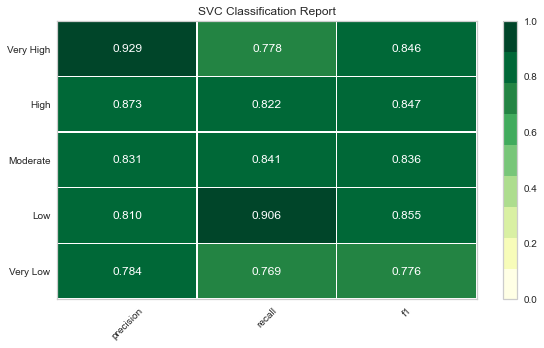

F1 SCORE NuSVC: 0.7833919156414761


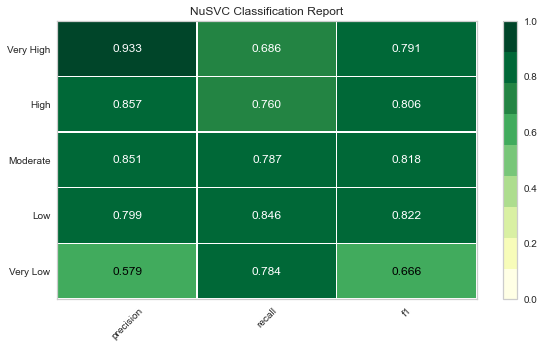

F1 SCORE LinearSVC: 0.7116102811950791


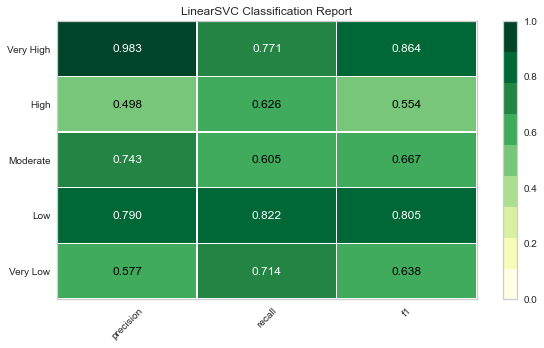

F1 SCORE SGDClassifier: 0.14499121265377857


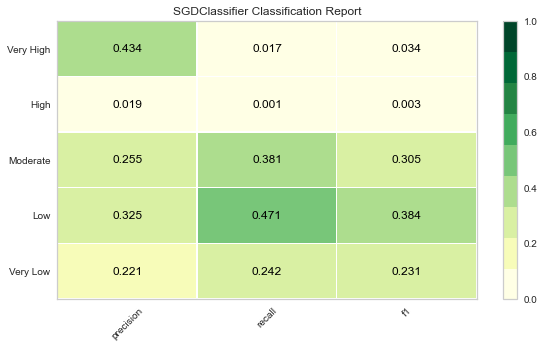

F1 SCORE KNeighborsClassifier: 0.6660808435852372


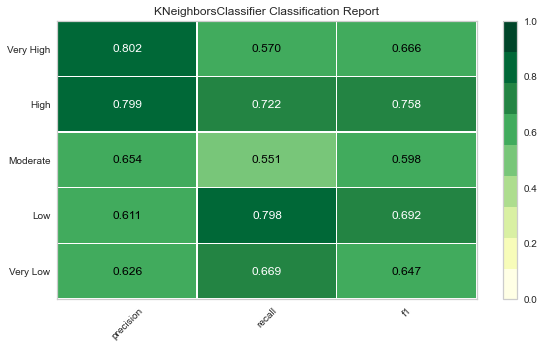

F1 SCORE LogisticRegression: 0.257743848857645


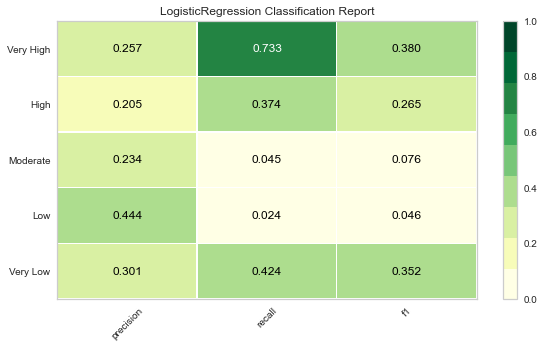

F1 SCORE LogisticRegressionCV: 0.28317223198594027


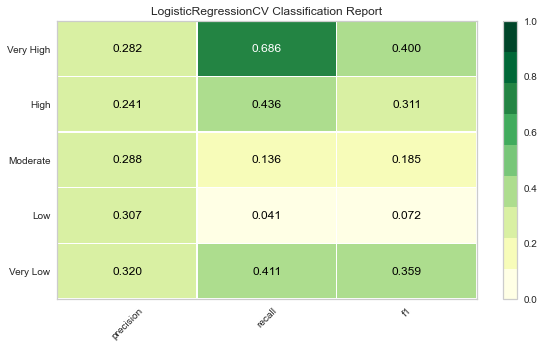

F1 SCORE BaggingClassifier: 1.0


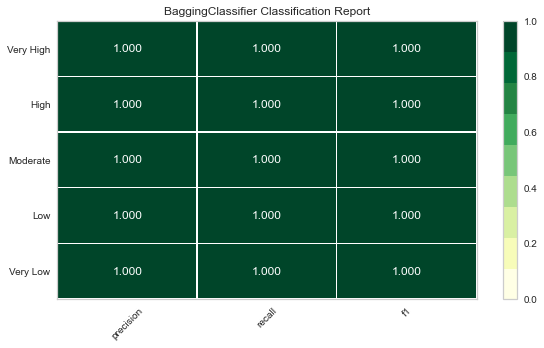

F1 SCORE ExtraTreesClassifier: 1.0


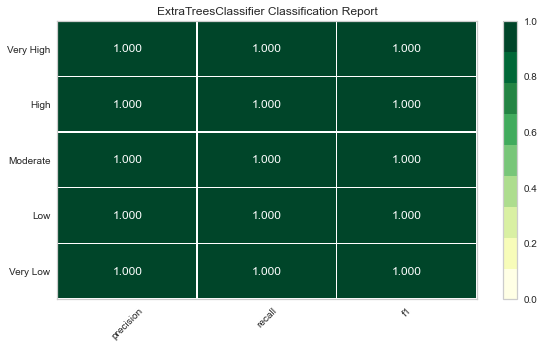

F1 SCORE RandomForestClassifier: 1.0


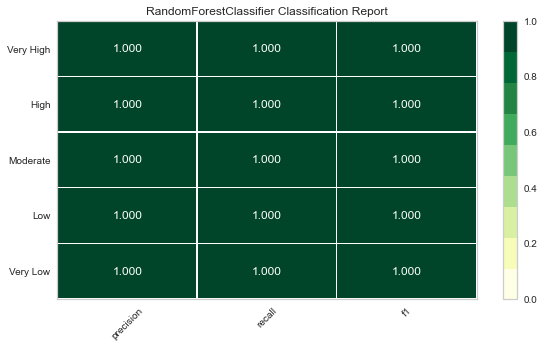

Dataset = est 
 Target = Child Opportunity Levels, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8375439367311072


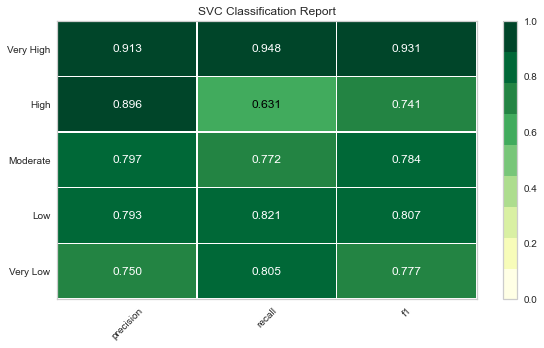

error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.7385764499121267


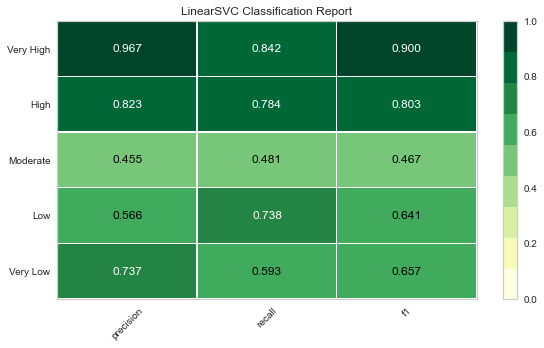

F1 SCORE SGDClassifier: 0.1861818980667838


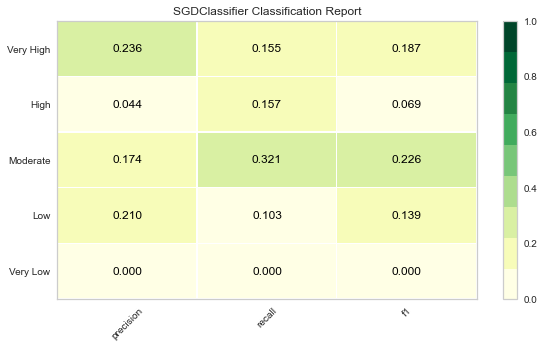

F1 SCORE KNeighborsClassifier: 0.6535039543057997


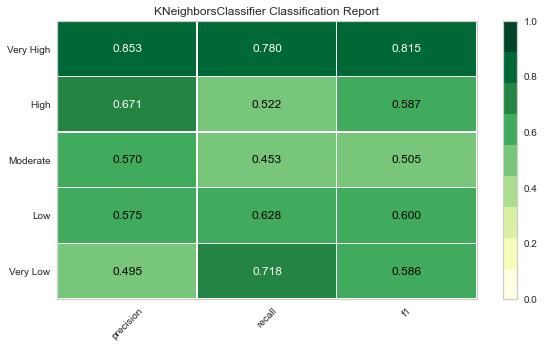

F1 SCORE LogisticRegression: 0.34171792618629176


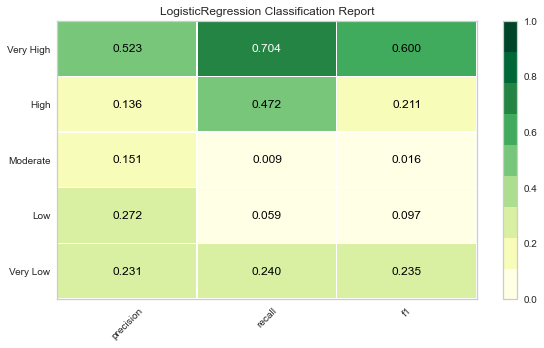

F1 SCORE LogisticRegressionCV: 0.3064586994727592


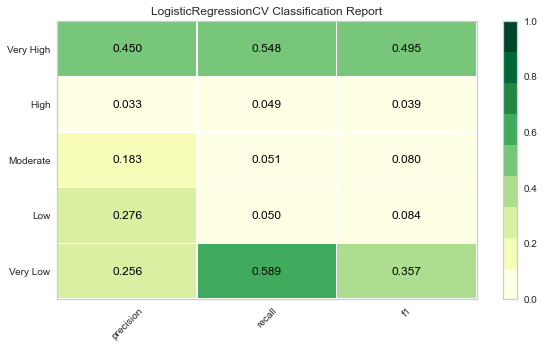

F1 SCORE BaggingClassifier: 1.0


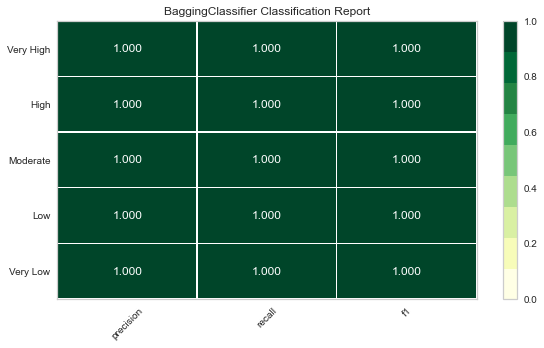

F1 SCORE ExtraTreesClassifier: 1.0


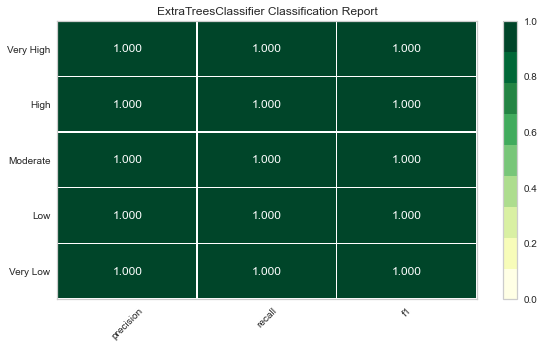

F1 SCORE RandomForestClassifier: 1.0


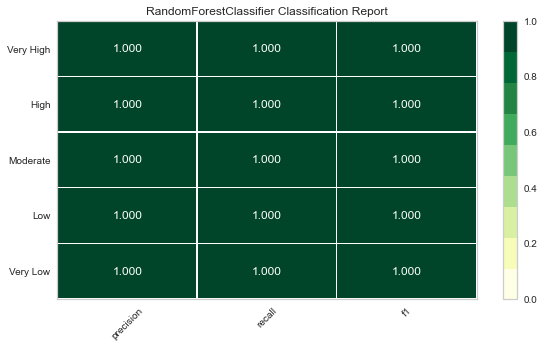

Dataset = est 
 Target = Child Opportunity Levels, social and economic domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8131041300527241


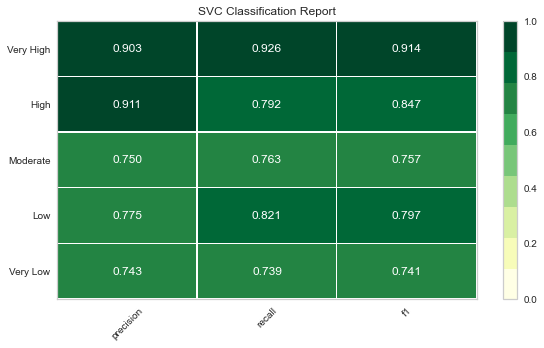

F1 SCORE NuSVC: 0.7457710896309314


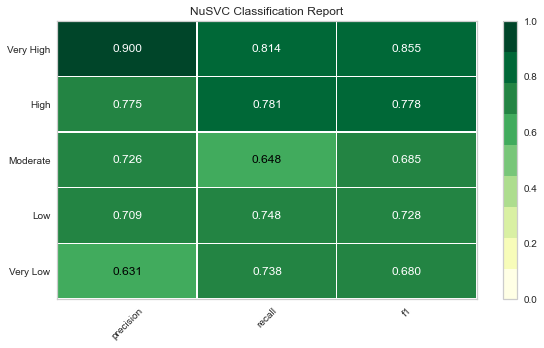

F1 SCORE LinearSVC: 0.6983194200351494


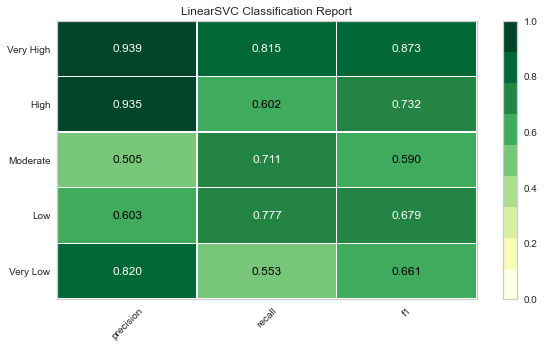

F1 SCORE SGDClassifier: 0.20880931458699473


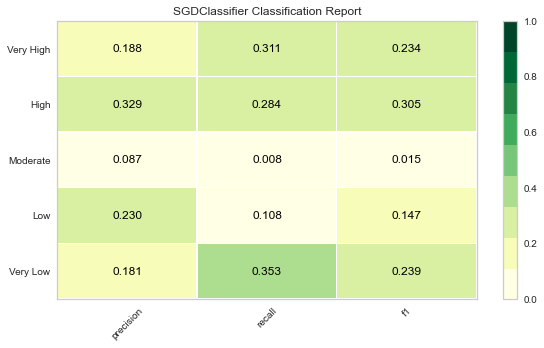

F1 SCORE KNeighborsClassifier: 0.7380272407732865


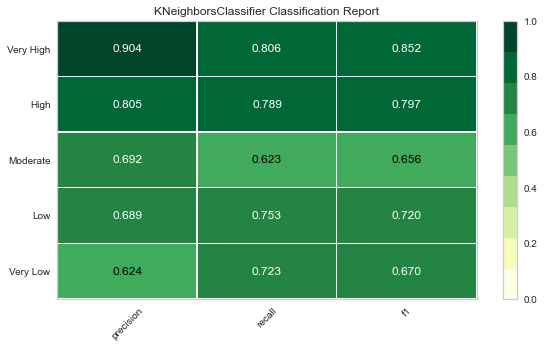

F1 SCORE LogisticRegression: 0.33809314586994726


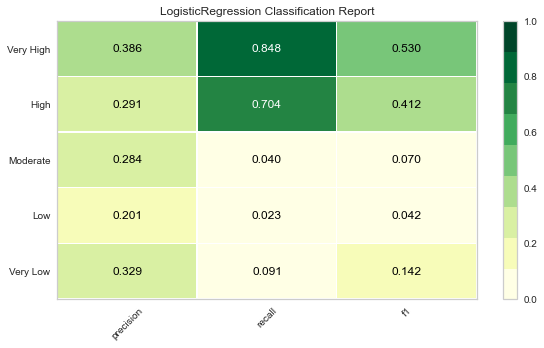

F1 SCORE LogisticRegressionCV: 0.32842706502636204


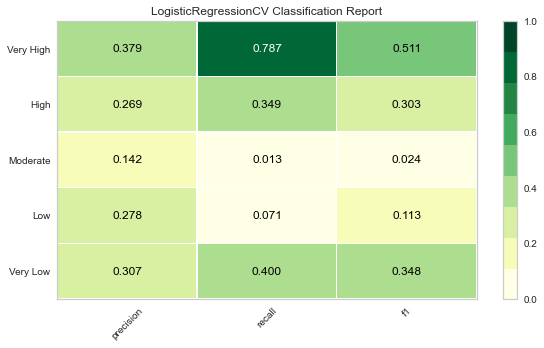

F1 SCORE BaggingClassifier: 1.0


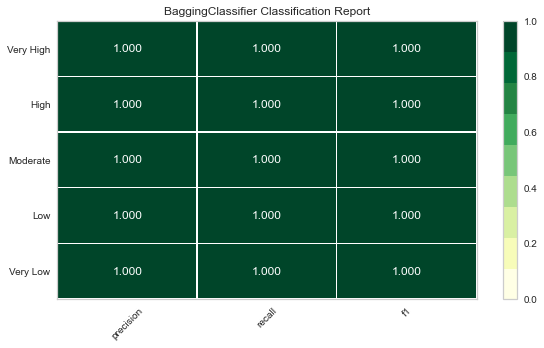

F1 SCORE ExtraTreesClassifier: 1.0


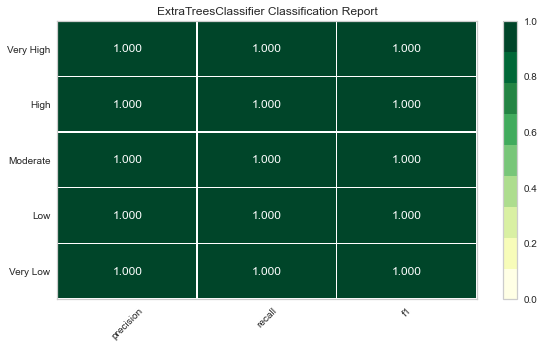

F1 SCORE RandomForestClassifier: 1.0


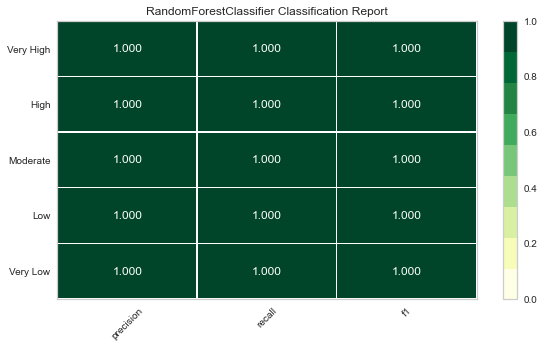

Dataset = est 
 Target = Child Opportunity Levels, overall COI, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.9008128295254832


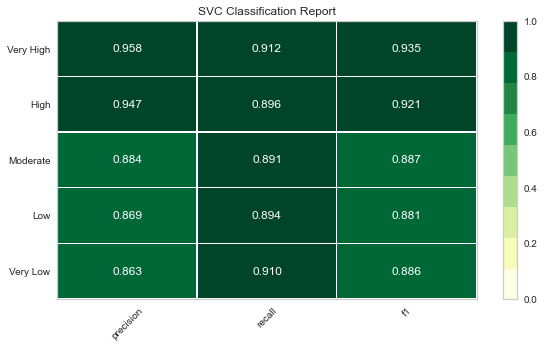

F1 SCORE NuSVC: 0.7941564147627417


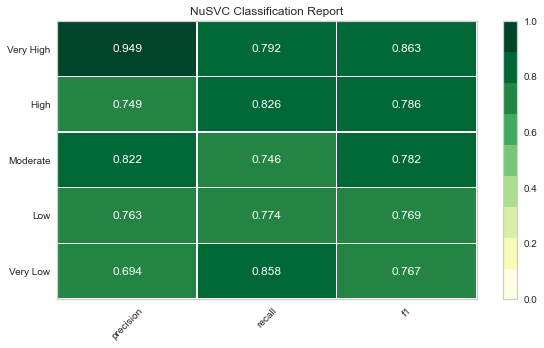

F1 SCORE LinearSVC: 0.7221001757469243


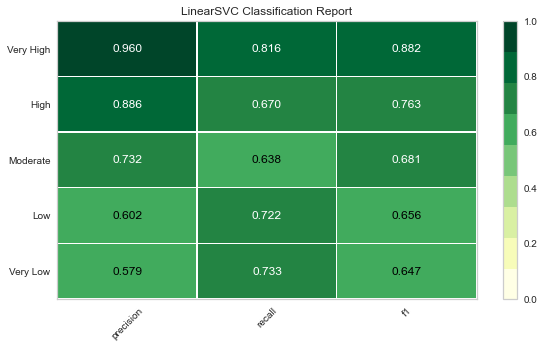

F1 SCORE SGDClassifier: 0.16921133567662566


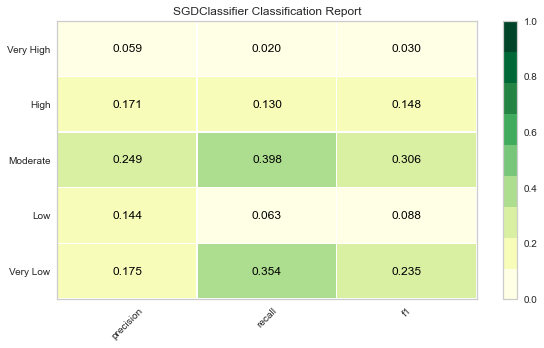

F1 SCORE KNeighborsClassifier: 0.788829086115993


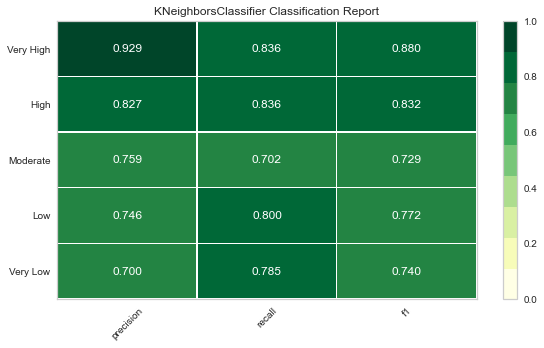

F1 SCORE LogisticRegression: 0.3366102811950791


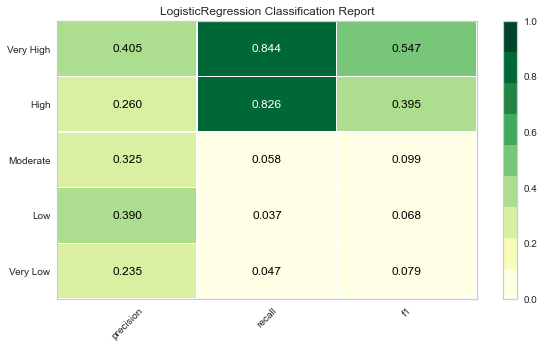

F1 SCORE LogisticRegressionCV: 0.32754833040421794


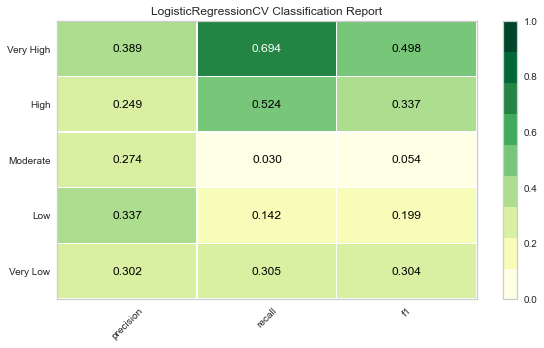

F1 SCORE BaggingClassifier: 1.0


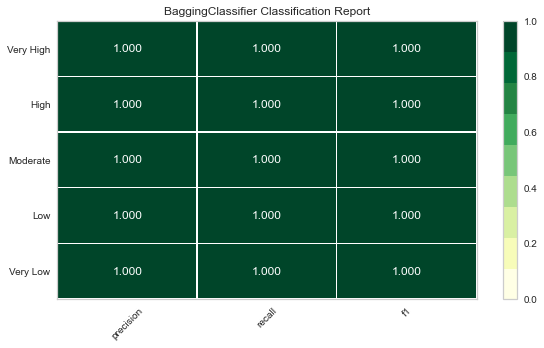

F1 SCORE ExtraTreesClassifier: 1.0


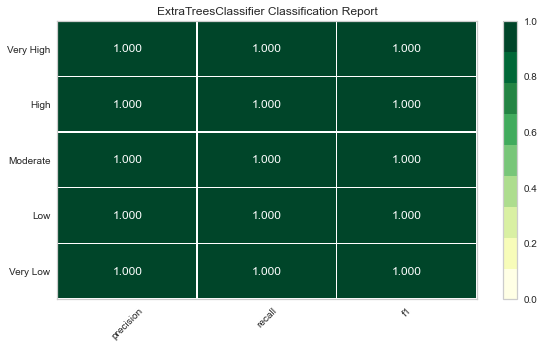

F1 SCORE RandomForestClassifier: 1.0


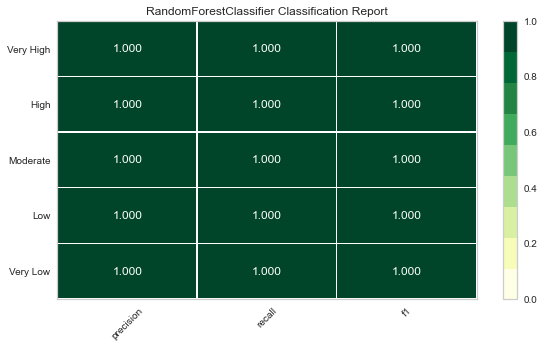

Dataset = est 
 Target = Child Opportunity Scores, education domain, nationally- normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.24659490333919157
error in SVC(gamma='auto')
error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.18612697715289983
error in LinearSVC()
F1 SCORE SGDClassifier: 0.007469244288224956
error in SGDClassifier(max_iter=100)
F1 SCORE KNeighborsClassifier: 0.2538993848857645
error in KNeighborsClassifier()
F1 SCORE LogisticRegression: 0.016146748681898068
error in LogisticRegression()
F1 SCORE LogisticRegressionCV: 0.01828866432337434
error in LogisticRegressionCV(cv=3)
F1 SCORE BaggingClassifier: 0.9950571177504394
error in BaggingClassifier()
F1 SCORE ExtraTreesClassifier: 1.0
error in ExtraTreesClassifier(n_estimators=300)
F1 SCORE RandomForestClassifier: 1.0
error in RandomForestClassifier(n_estimators=300)
Dataset = est 
 Target = Child Opportunity Scores, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)


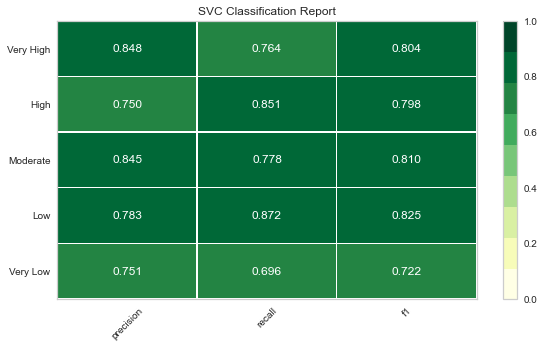

F1 SCORE NuSVC: 0.7557666959578208


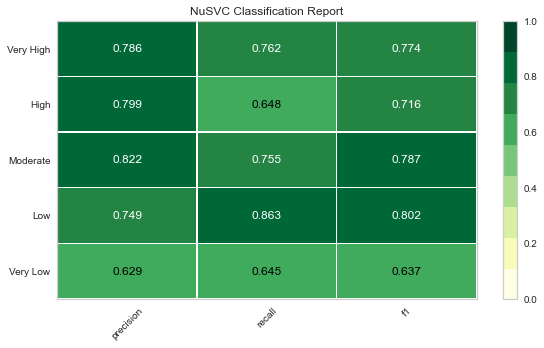

F1 SCORE LinearSVC: 0.7462104569420035


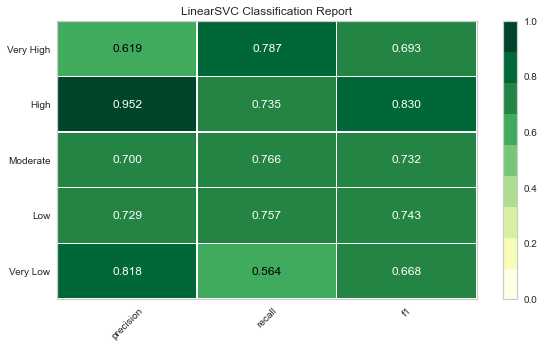

F1 SCORE SGDClassifier: 0.2647188049209139


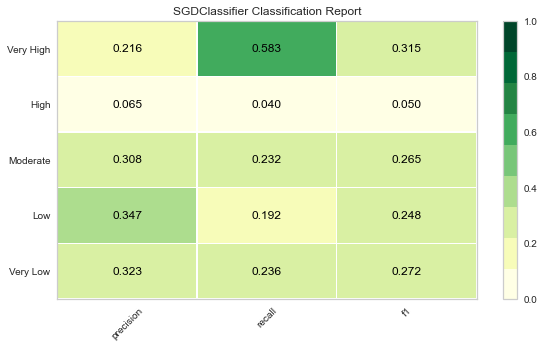

F1 SCORE KNeighborsClassifier: 0.6594354130052724


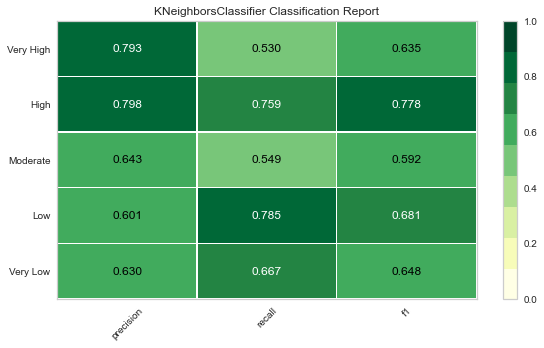

F1 SCORE LogisticRegression: 0.24192662565905096


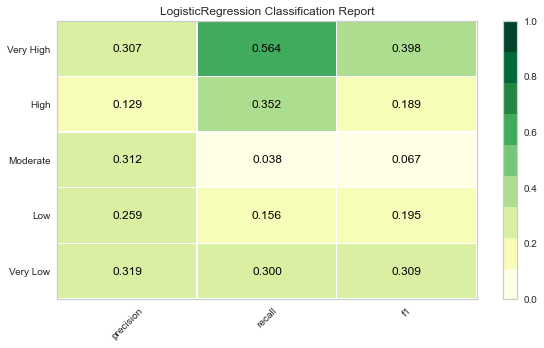

F1 SCORE LogisticRegressionCV: 0.26208260105448156


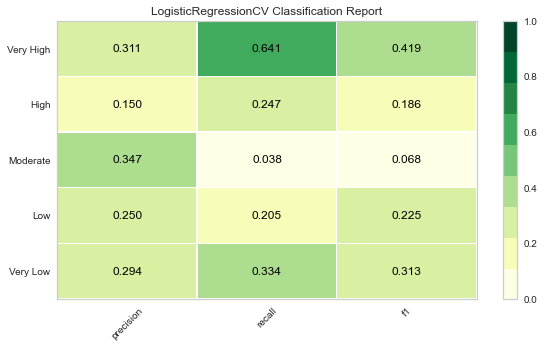

F1 SCORE BaggingClassifier: 1.0


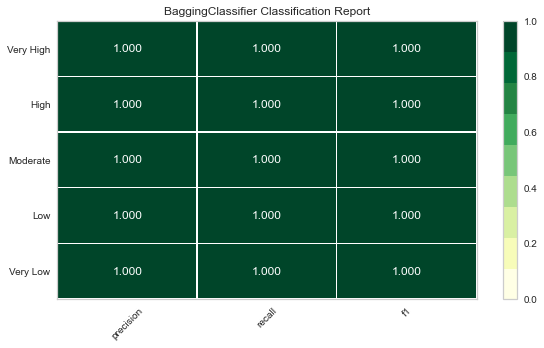

F1 SCORE ExtraTreesClassifier: 1.0


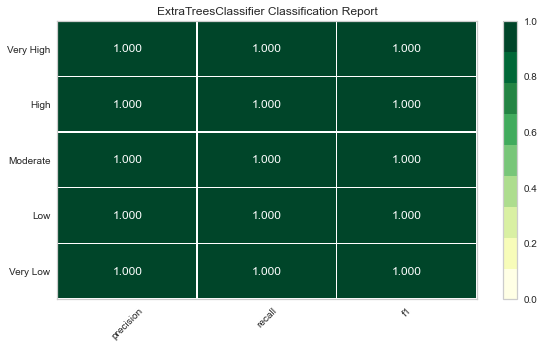

F1 SCORE RandomForestClassifier: 1.0


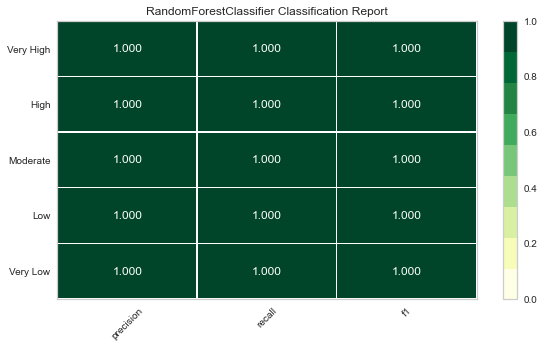

Dataset = pct 
 Target = Child Opportunity Levels, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8026142355008787


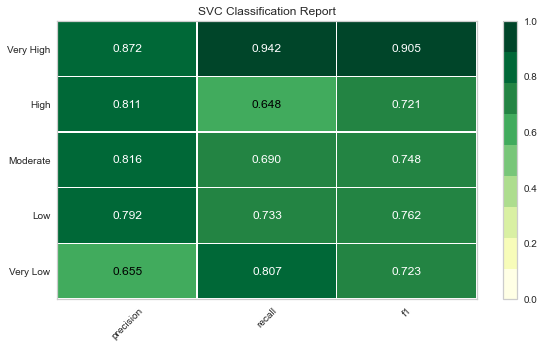

error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.7150702987697716


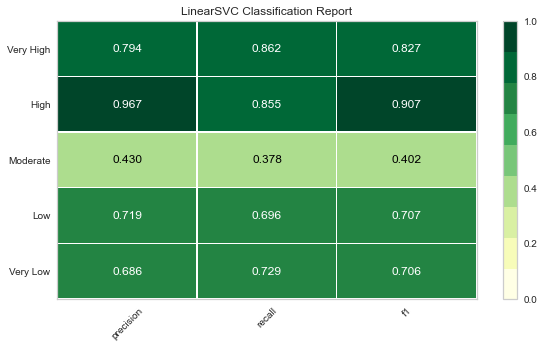

F1 SCORE SGDClassifier: 0.195353690685413


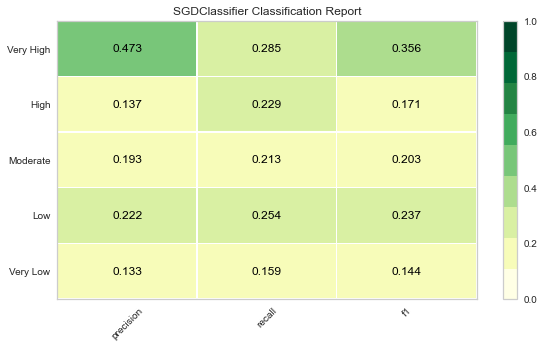

F1 SCORE KNeighborsClassifier: 0.6427943760984183


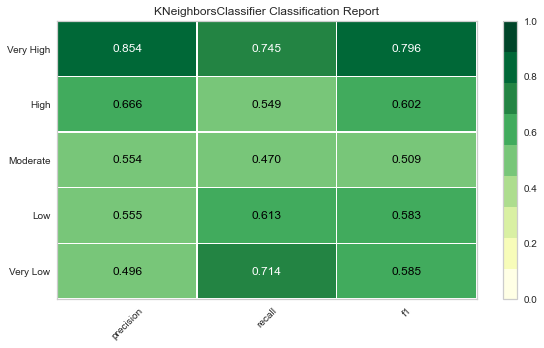

F1 SCORE LogisticRegression: 0.2547231985940246


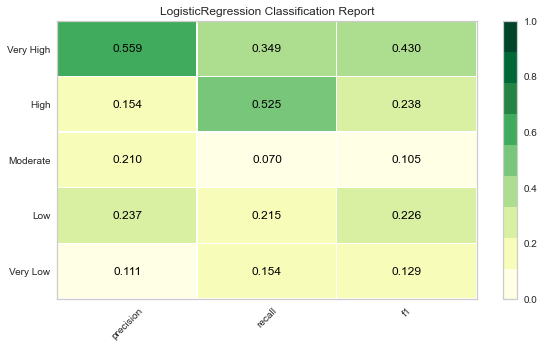

F1 SCORE LogisticRegressionCV: 0.24708919156414763


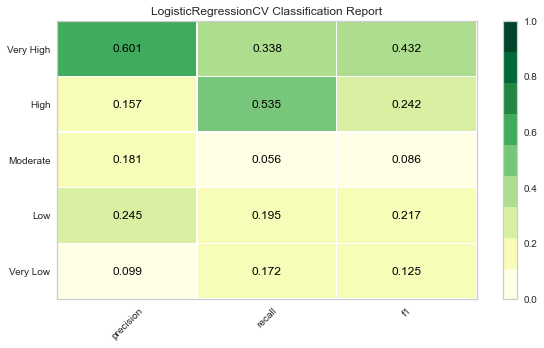

F1 SCORE BaggingClassifier: 1.0


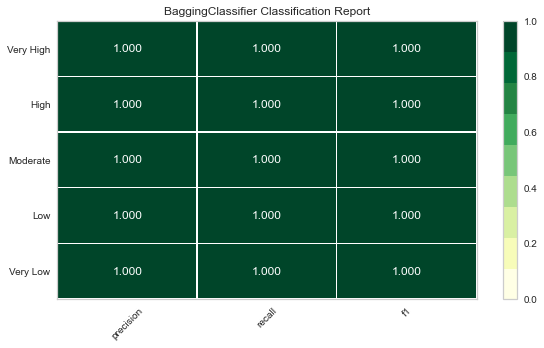

F1 SCORE ExtraTreesClassifier: 1.0


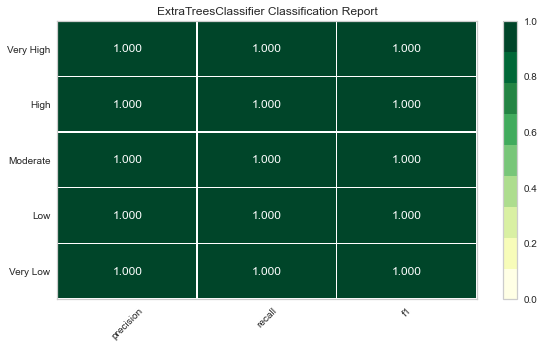

F1 SCORE RandomForestClassifier: 1.0


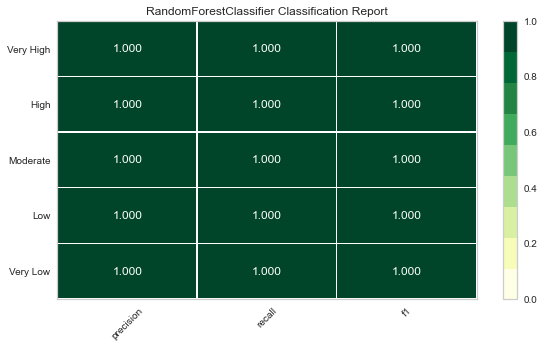

Dataset = pct 
 Target = Child Opportunity Levels, social and economic domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.7871814586994728


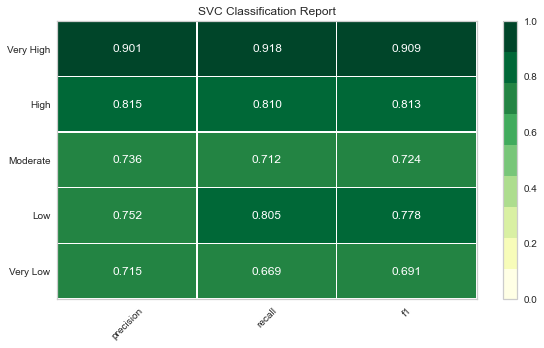

F1 SCORE NuSVC: 0.7182557117750439


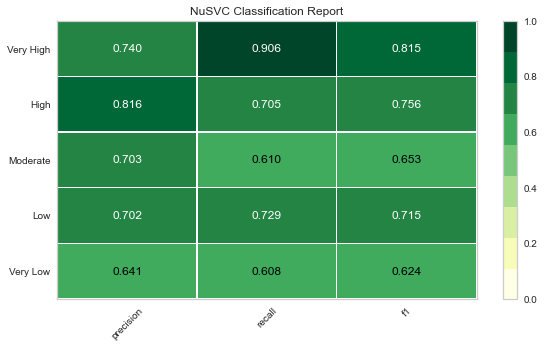

F1 SCORE LinearSVC: 0.75027460456942


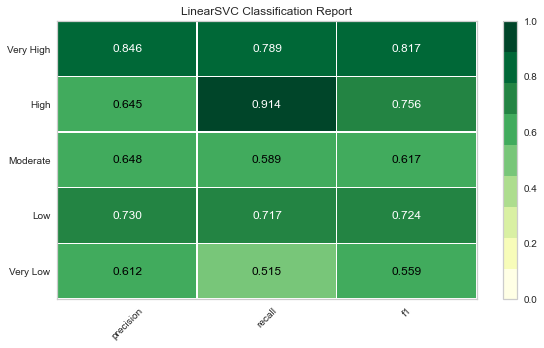

F1 SCORE SGDClassifier: 0.2125988576449912


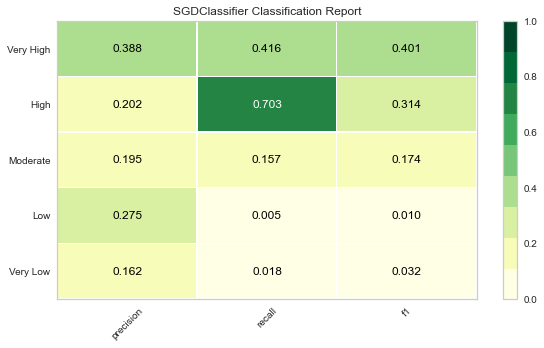

F1 SCORE KNeighborsClassifier: 0.7361599297012302


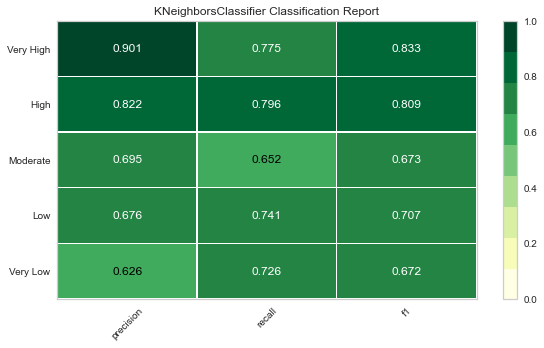

F1 SCORE LogisticRegression: 0.2825681019332162


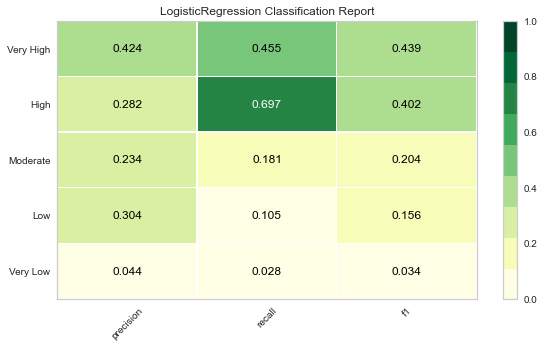

F1 SCORE LogisticRegressionCV: 0.28954305799648505


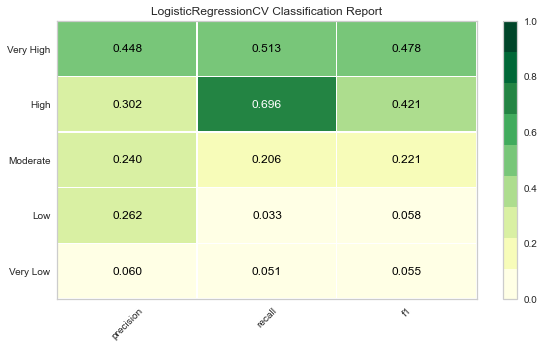

F1 SCORE BaggingClassifier: 1.0


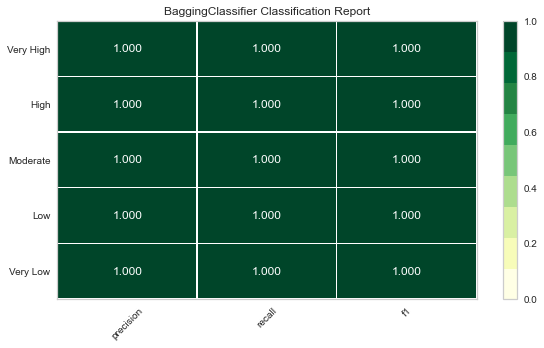

F1 SCORE ExtraTreesClassifier: 1.0


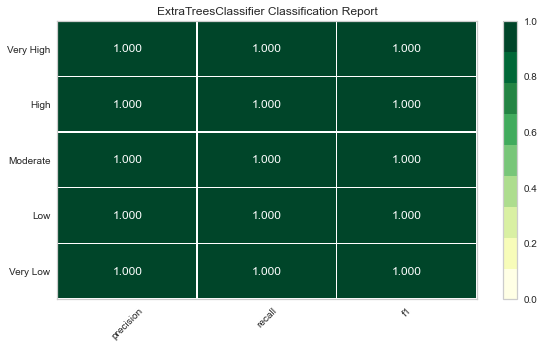

F1 SCORE RandomForestClassifier: 1.0


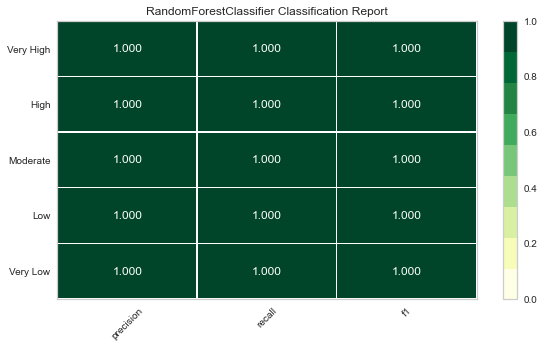

Dataset = pct 
 Target = Child Opportunity Levels, overall COI, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8699472759226714


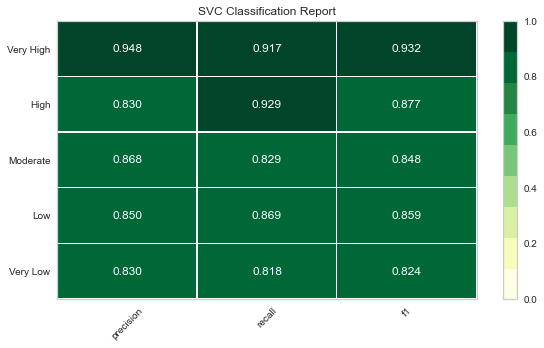

F1 SCORE NuSVC: 0.7800966608084359


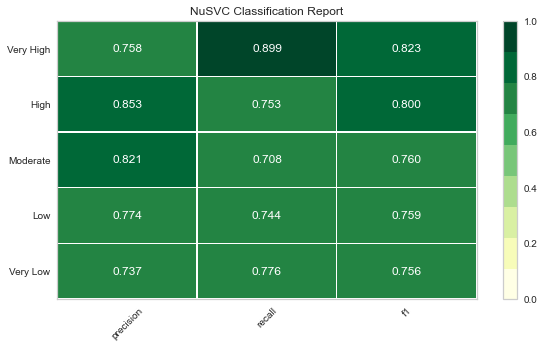

F1 SCORE LinearSVC: 0.7570847978910369


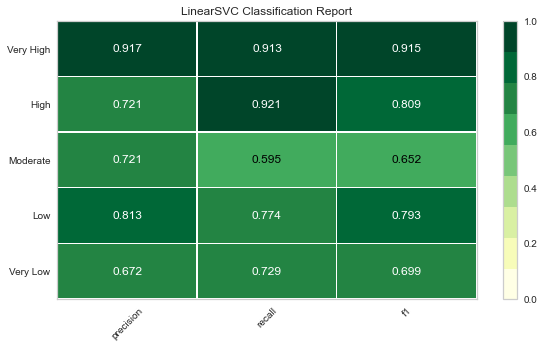

F1 SCORE SGDClassifier: 0.3008018453427065


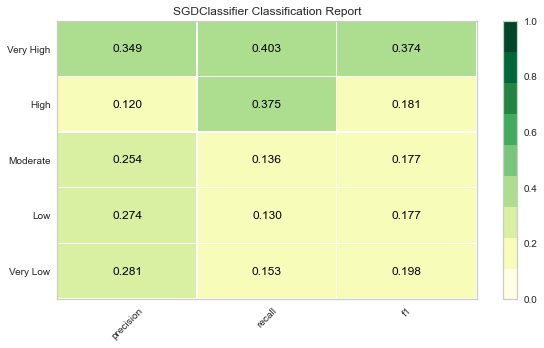

F1 SCORE KNeighborsClassifier: 0.7783391915641477


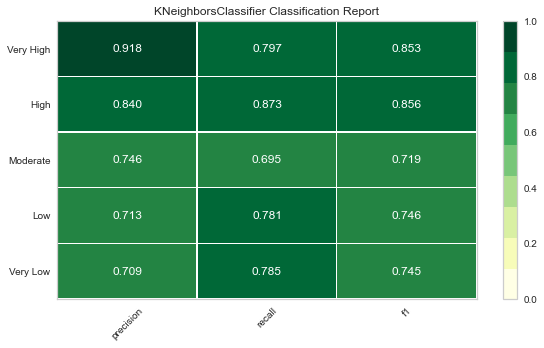

F1 SCORE LogisticRegression: 0.29426625659050965


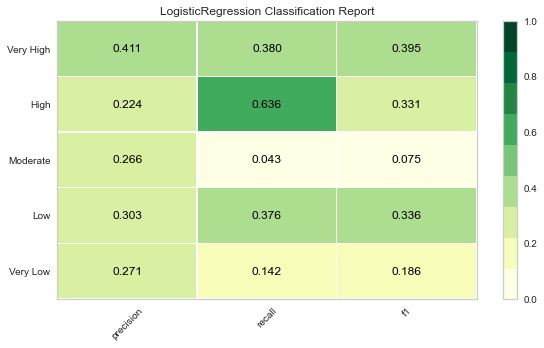

F1 SCORE LogisticRegressionCV: 0.31453207381370824


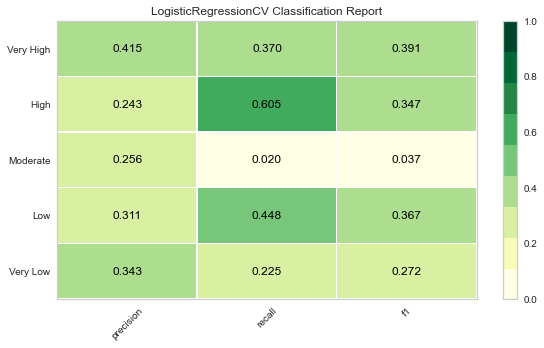

F1 SCORE BaggingClassifier: 1.0


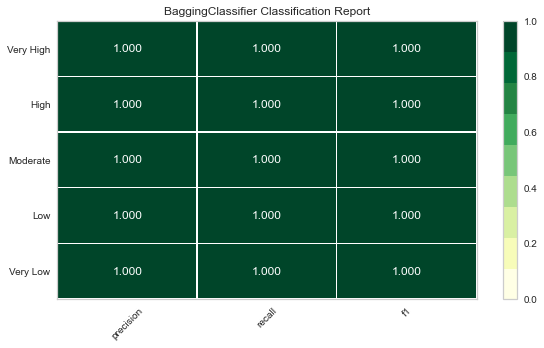

F1 SCORE ExtraTreesClassifier: 1.0


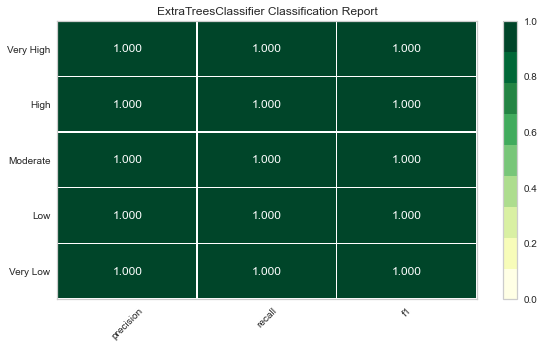

F1 SCORE RandomForestClassifier: 1.0


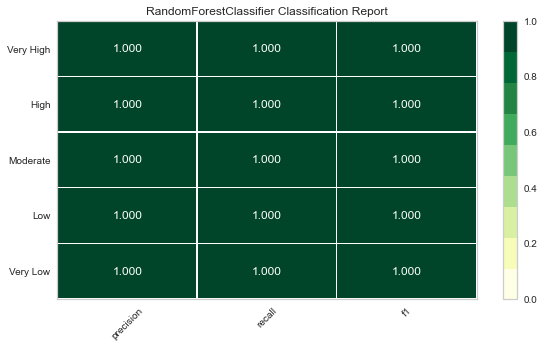

Dataset = pct 
 Target = Child Opportunity Scores, education domain, nationally- normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.2467047451669596
error in SVC(gamma='auto')
error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.19485940246045694
error in LinearSVC()
F1 SCORE SGDClassifier: 0.014059753954305799
error in SGDClassifier(max_iter=100)
F1 SCORE KNeighborsClassifier: 0.2564257469244288
error in KNeighborsClassifier()
F1 SCORE LogisticRegression: 0.01905755711775044
error in LogisticRegression()
F1 SCORE LogisticRegressionCV: 0.021144551845342707
error in LogisticRegressionCV(cv=3)
F1 SCORE BaggingClassifier: 0.9956063268892794
error in BaggingClassifier()
F1 SCORE ExtraTreesClassifier: 1.0
error in ExtraTreesClassifier(n_estimators=300)
F1 SCORE RandomForestClassifier: 1.0
error in RandomForestClassifier(n_estimators=300)
Dataset = pct 
 Target = Child Opportunity Scores, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F

<Figure size 600x360 with 0 Axes>

In [28]:
for i in [est,pct]:
    for z in cols:
        X = i.loc[:, i.columns != z]
        y = i[z]
        name = [x for x in globals() if globals()[x] is i][0]
        print('Dataset =',name,'\n','Target =', z)
        train_test(X,y)
        for model in models:
            try:
                score_model(X, y, model)
                visualize_model(X, y, model)
            except:
                print("error in",model)